<a href="https://colab.research.google.com/github/shubham25091998/machine_learning/blob/main/LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub
from kagglehub import KaggleDatasetAdapter
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import urllib.request
import os
import zipfile

In [ ]:
def loadData():
  urllib.request.urlretrieve("https://drive.google.com/uc?export=download&id=1IGQBbrh_YJTX7Om1GuNbTrNiZjwLappO", "rawData.zip")

  with zipfile.ZipFile("rawData.zip", "r") as zip_ref:
    zip_ref.extractall()

  raw_data = pd.read_csv("SOCR-HeightWeight.csv")
  return raw_data

data = loadData()
data = data.drop(columns=["Index"])
data.head()

,Height(Inches),Weight(Pounds)
0,65.78331,112.9925
1,71.51521,136.4873
2,69.39874,153.0269
3,68.21660,142.3354
4,67.78781,144.2971


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Height(Inches)  25000 non-null  float64
 1   Weight(Pounds)  25000 non-null  float64
dtypes: float64(2)
memory usage: 390.8 KB


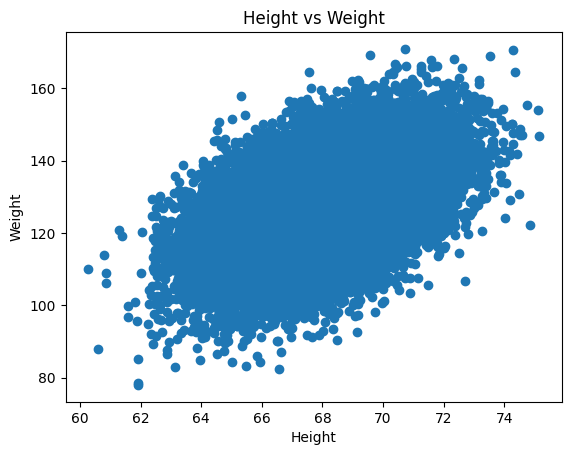

In [ ]:
plt.scatter(data["Height(Inches)"], data["Weight(Pounds)"])
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

In [ ]:
data.corr()

,Height(Inches),Weight(Pounds)
Height(Inches),1.000000,0.502859
Weight(Pounds),0.502859,1.000000


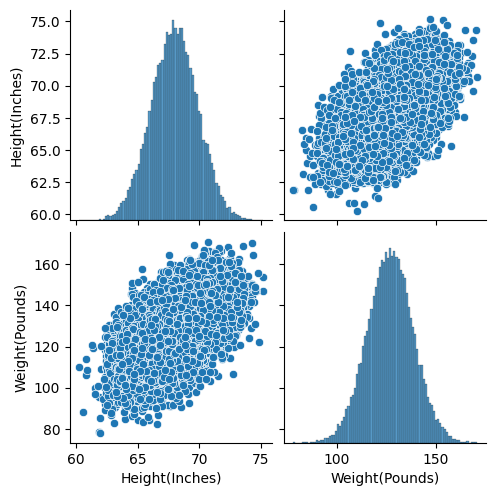

In [ ]:
sns.pairplot(data)
plt.show()

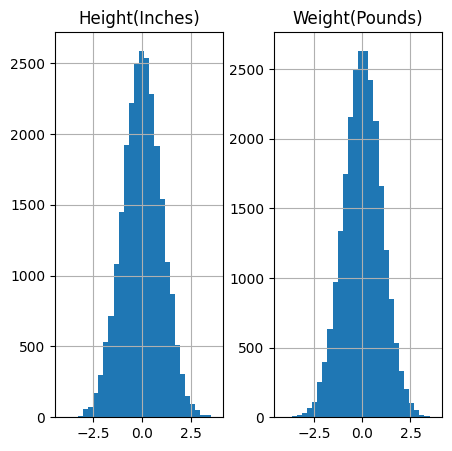

In [ ]:
data.hist(bins = 30, figsize=(5, 5))
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data = scaler.fit_transform(data)
data = pd.DataFrame(data, columns=["Height(Inches)", "Weight(Pounds)"])

In [ ]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(data[["Height(Inches)"]], data["Weight(Pounds)"], test_size=0.3)


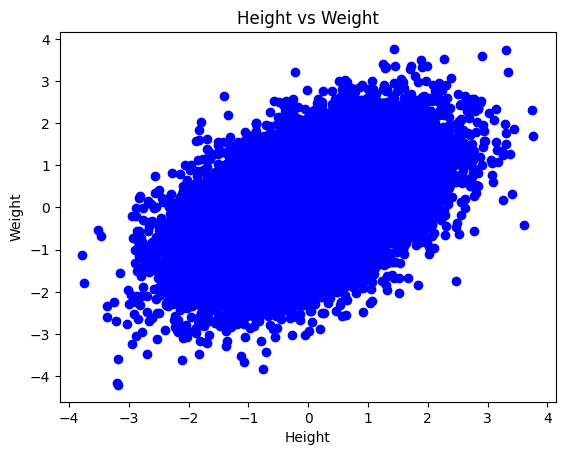

In [ ]:
plt.scatter(x_train, y_train, color="blue")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(x_train, y_train)
res = model.predict(x_test)
print("Intercept Theta 0 : ", model.intercept_)
print("Coefficient Theta 1 : ", model.coef_)

Intercept Theta 0 :  0.0027555135613378506
Coefficient Theta 1 :  [0.50541128]


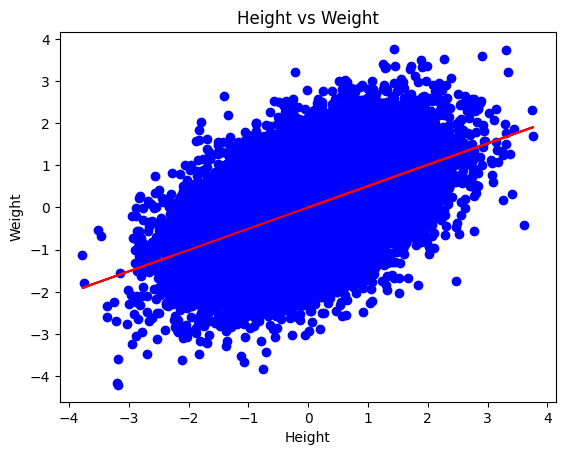

In [ ]:
plt.scatter(x_train, y_train, color="blue")
plt.plot(x_train, model.predict(x_train), color="red")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.title("Height vs Weight")
plt.show()

In [ ]:
res = model.predict(x_test)

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

print("R2 Score : ", r2_score(y_test, res))
print("Mean Squared Error : ", mean_squared_error(y_test, res))
print("Mean Absolute Error : ", mean_absolute_error(y_test, res))


R2 Score :  0.249895399648836
Mean Squared Error :  0.7500515717186325
Mean Absolute Error :  0.6910192525479542


In [ ]:
import statsmodels.api as sm

x_train_sm = sm.add_constant(x_train)
model = sm.OLS(y_train, x_train_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:         Weight(Pounds)   R-squared:                       0.254
Model:                            OLS   Adj. R-squared:                  0.254
Method:                 Least Squares   F-statistic:                     5961.
Date:                Sun, 27 Apr 2025   Prob (F-statistic):               0.00
Time:                        13:09:47   Log-Likelihood:                -22266.
No. Observations:               17500   AIC:                         4.454e+04
Df Residuals:                   17498   BIC:                         4.455e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0028      0.007      0.

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

model = make_pipeline(PolynomialFeatures(degree=2), LinearRegression())
model.fit(x_train, y_train)

print("R2 Score:", model.score(x_test, y_test))


R2 Score: 0.249738574660065


# Linear Regression from scratch

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_linear_dataset(n_samples=100, slope=5, intercept=10, noise_std=10, plot=True):
    np.random.seed(42)
    X = np.random.uniform(0, 100, size=n_samples)
    noise = np.random.normal(0, noise_std, size=n_samples)
    y = slope * X + intercept + noise

    df = pd.DataFrame({'Feature': X, 'Target': y})
    return df

# Example usage
dataset = create_linear_dataset(n_samples=200, slope=3.5, intercept=15, noise_std=8)
print(dataset.head())


     Feature      Target
0  37.454012  140.648844
1  95.071431  349.608037
2  73.199394  273.542459
3  59.865848  218.815658
4  15.601864   84.532720


In [11]:
print(dataset.iloc[90])

Feature    11.959425
Target     60.897884
Name: 90, dtype: float64


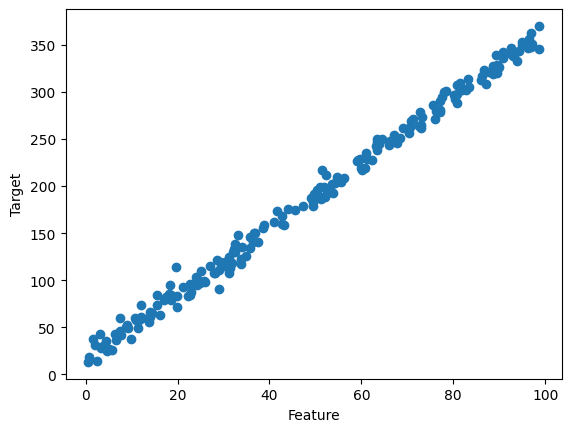

In [12]:
plt.scatter(dataset["Feature"], dataset["Target"])
plt.xlabel("Feature")
plt.ylabel("Target")
plt.show()

In [13]:
dataset.corr()

,Feature,Target
Feature,1.000000,0.997183
Target,0.997183,1.000000


In [14]:
def train_test_split(dataset, test_ratio=0):
  if test_ratio == 0:
    return dataset, None
  else:
    test_size = int(len(dataset) * test_ratio)
    test_indices = np.random.randint(0, len(dataset), test_size)
    test_set = dataset.iloc[test_indices]
    train_set = dataset.drop(test_indices)
    return train_set, test_set

train_set, test_set = train_test_split(dataset, test_ratio=0.3)
x_train = train_set[["Feature"]]
y_train = train_set["Target"]
x_test = test_set[["Feature"]]
y_test = test_set["Target"]

In [15]:
std_ = 1
mean_ = 0

# Standard Normalization
def normalize(dataset, fit = 1):
  global std_, mean_
  if fit == 1:
    std_ = dataset.std()
    mean_ = dataset.mean()
  return (dataset - mean_) / std_

x_train = normalize(x_train,1)
x_test = normalize(x_test,0)


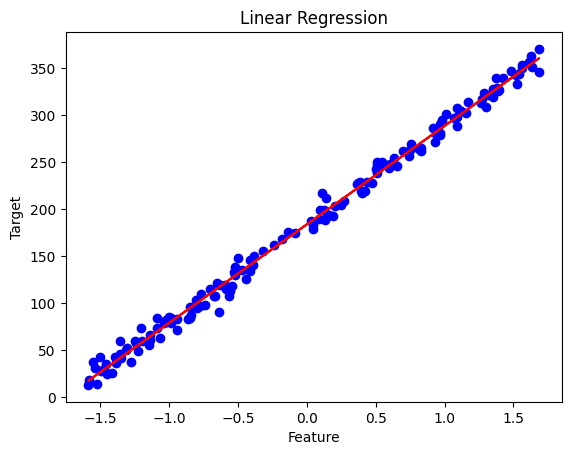

In [16]:
class LinearRegression:
  def __init__(self, lr=0.001, n_iters=1000):
    self.learning_rate = lr
    self.n_iters = n_iters
    self.intercept = 0
    self.coefficient = []
    self.dw = 0
    self.db = 0

  def fit_transform(self, x, y):
    n_samples, n_features = x.shape
    self.coefficient = np.zeros(n_features) + 1
    for _ in range(self.n_iters):
      y_pred = np.dot(x, self.coefficient) + self.intercept

      self.dw = (2/n_samples) * np.dot(x.T, (y_pred - y))
      self.db = (2/n_samples) * np.sum(y_pred - y)

      self.coefficient -= self.learning_rate * self.dw
      self.intercept -= self.learning_rate * self.db

  def predict(self, x):
    return np.dot(x, self.coefficient) + self.intercept

  def plot(self):
    plt.scatter(x_train, y_train, color="blue")
    plt.plot(x_train, self.predict(x_train), color="red")
    plt.xlabel("Feature")
    plt.ylabel("Target")
    plt.title("Linear Regression")
    plt.show()

model = LinearRegression(lr=0.01, n_iters=1000)
model.fit_transform(x_train, y_train)
res = model.predict(x_test)
model.plot()

In [17]:
x = pd.DataFrame({"Feature": [50]})
x = normalize(x,0)
print(model.predict(x))

[190.28086536]


In [18]:
def r2_score(y_true, y_pred):
    mean_true = np.mean(y_true)
    ss_total = np.sum((y_true - mean_true) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    r2 = 1 - (ss_residual / ss_total)
    return r2

print("R2 Score : ", r2_score(y_test, res))

def RMSE(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))

print("RMSE : ", RMSE(y_test, res))

R2 Score :  0.9917562463375907
RMSE :  8.49429838095996


# Linear Regression Using Scikitlearn

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import urllib.request

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

def create_linear_dataset(n_samples=100, slope=5, intercept=10, noise_std=10, plot=True):
    np.random.seed(42)
    X = np.random.uniform(0, 100, size=n_samples)
    noise = np.random.normal(0, noise_std, size=n_samples)
    y = slope * X + intercept + noise

    df = pd.DataFrame({'Feature': X, 'Target': y})
    return df

# Example usage
dataset = create_linear_dataset(n_samples=200, slope=3.5, intercept=15, noise_std=8)
print(dataset.head())


     Feature      Target
0  37.454012  140.648844
1  95.071431  349.608037
2  73.199394  273.542459
3  59.865848  218.815658
4  15.601864   84.532720


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

x_train, x_test, y_train, y_test = train_test_split(dataset[["Feature"]], dataset["Target"], test_size=0.3)

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

In [22]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

model = LinearRegression()
model.fit(x_train, y_train)
res = model.predict(x_test)

print("R2 Score : ", r2_score(y_test, res))
print("Mean Squared Error : ", mean_squared_error(y_test, res))

R2 Score :  0.9953336447373299
Mean Squared Error :  50.188988270075725


In [23]:
x = pd.DataFrame({"Feature": [50]})
x = scaler.transform(x)
print(model.predict(x))

[190.72070698]
